In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pydub

In [ ]:
from IPython.display import Audio
import os
import librosa
import numpy as np
from pydub import AudioSegment
from pydub.playback import play
from scipy import signal
import soundfile as sf
import re

In [ ]:
import scipy.io.wavfile as wav

def detect_ball_drops(audio_path, distance=20000, height=0.01):
    # Load audio file
    y, sr = librosa.load(audio_path, mono=False)

    # Check the number of channels
    num_channels = y.shape[0]
    print('Number of Channels:', num_channels)

    channels = []
    # extract channels
    for i in range(num_channels):
        channel_data = y[i, :]
        channels.append(channel_data)

    # extract peaks
    peaks = []
    for ch in channels:
        new_peaks = signal.find_peaks(ch, height=height, distance=distance)[0]
        peaks.append(new_peaks.tolist())

    print(peaks)
    return peaks

def handle_more_than_four_drops(y, times):
    values = [y[idx] for idx in times]
    min_val = min(values)

    # find minimum value
    for idx in times:
        if y[idx] == min_val:
            times.remove(idx)
    return times

def split_audio_on_drops(audio_path, output_dir, tot_times, coors):
    # Load audio file
    y, sr = librosa.load(audio_path, mono=False)
    print('Audio Shape:', y.shape)

    # Check the number of channels
    num_channels = y.shape[0]

    channels = []
    # extract channels
    for i in range(num_channels):
        channel_data = y[i, :]
        channels.append(channel_data)

    for i in range(num_channels):
        times = tot_times[i]
        y_new = channels[i]

        # Ensure times contains less or equal than 4 elements
        if len(times) > 4:
            print("The number of detected ball drops is more than 4.")
            times = handle_more_than_four_drops(y_new, times)
            print('Handled times:', times)

        # Split and save the audio segments
        start_time = 0
        for z in range(len(times)):
            end_time = int(((times[z + 1] + times[z]) / 2)) if z + 1 < len(times) else len(y_new)
            segment = y_new[start_time:end_time]
            sf.write(f"{output_dir}/ch{i+1}_[{coors[0]}-{coors[1]}-{coors[2]}]_{z+1}.wav", segment, sr, format='wav')
            print(f"Saved ball drop {z+1} of channel {i} from {start_time} to {end_time}.")
            start_time = end_time

def extract_numbers(file_name):
    numbers = re.findall(r'\d+', file_name)
    numbers = list(map(int, numbers))
    if numbers[2] == 75:
        numbers[2] = 74
    return numbers

def divide_samlpes(folder, output_dir):
    for file_name in os.listdir(folder):
            if file_name.endswith(".wav"):
                file_path = os.path.join(folder, file_name)
                coors = extract_numbers(file_name)
                print("\nSample:", coors)
                times = detect_ball_drops(file_path)
                split_audio_on_drops(file_path, output_dir, times, coors)

def examine_all_samples(inp_folders, out_folders):
    for i in range(len(inp_folders)):
        print(f'******\nSatrt of Division for {inp_folders[i]} to {out_folders[i]}.\n******')
        divide_samlpes(inp_folders[i], out_folders[i])
        print(f'******\nDivision for {inp_folders[i]} to {out_folders[i]} done.\n*******')

In [ ]:
# Output and input directory to save the split audio files
input_dir_k1 = '/content/drive/MyDrive/Taarlab/Classical/Main/2Kinects/K1/K1-All'
input_dir_k2 = '/content/drive/MyDrive/Taarlab/Classical/Main/2Kinects/K2/K2-All'
inp_folders = [input_dir_k1, input_dir_k2]

output_dir_1 = '/content/drive/MyDrive/Taarlab/Classical/Main/2Kinects/divided/K1'
output_dir_2 = '/content/drive/MyDrive/Taarlab/Classical/Main/2Kinects/divided/K2'
out_folders = [output_dir_1, output_dir_2]

examine_all_samples(inp_folders, out_folders)

******
Satrt of Division for /content/drive/MyDrive/Taarlab/Classical/Main/2Kinects/K1/K1-All to /content/drive/MyDrive/Taarlab/Classical/Main/2Kinects/divided/K1.
******

Sample: [8, 392, 0]
Number of Channels: 4
[[31632, 71441, 109169], [31629, 71438, 109166], [31627, 71437, 109166], [31628, 71511, 109165]]
Audio Shape: (4, 134726)
Saved ball drop 1 of channel 0 from 0 to 51536.
Saved ball drop 2 of channel 0 from 51536 to 90305.
Saved ball drop 3 of channel 0 from 90305 to 134726.
Saved ball drop 1 of channel 1 from 0 to 51533.
Saved ball drop 2 of channel 1 from 51533 to 90302.
Saved ball drop 3 of channel 1 from 90302 to 134726.
Saved ball drop 1 of channel 2 from 0 to 51532.
Saved ball drop 2 of channel 2 from 51532 to 90301.
Saved ball drop 3 of channel 2 from 90301 to 134726.
Saved ball drop 1 of channel 3 from 0 to 51569.
Saved ball drop 2 of channel 3 from 51569 to 90338.
Saved ball drop 3 of channel 3 from 90338 to 134726.

Sample: [54, 188, 0]
Number of Channels: 4
[[10577,

In [ ]:

path = '/content/drive/MyDrive/Taarlab/Classical/Main/2Kinects/K1/k1-labeled_coores/100-340-74.wav'
# sample_rate, data = wav.read(path)
y, sr = librosa.load(path, mono=False)
print(max(y[1]))

0.0785777


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, BatchNormalization

def get_network(inp_shape, summary=False):
    # Define the model
    model = models.Sequential()

    # First convolutional layer with 24 kernels of size 3x3
    model.add(layers.Conv2D(48, (3, 3), activation='relu', padding='same', input_shape=inp_shape))
    # Max pooling layer with size 2x2
    model.add(layers.MaxPooling2D((2, 2)))
    # model.add(BatchNormalization())

    # Second convolutional layer with 48 kernels of size 2x2
    model.add(layers.Conv2D(48, (2, 2), activation='relu', padding='same'))
    # Max pooling layer with size 2x2
    model.add(layers.MaxPooling2D((2, 2)))
    # model.add(BatchNormalization())

    # Third convolutional layer with 48 kernels of size 2x2
    model.add(layers.Conv2D(48, (2, 2), activation='relu', padding='same'))
    # Flatten the output for the fully connected layers
    # model.add(BatchNormalization())
    model.add(layers.Flatten())

    # Fully connected layer with 500 nodes
    model.add(layers.Dense(256, activation='linear'))
    # Output layer with 2 nodes (for binary classification or regression with 2 outputs)
    model.add(layers.Dense(2, activation='linear'))

    # Summary of the model
    if summary:
        model.summary()

    return model

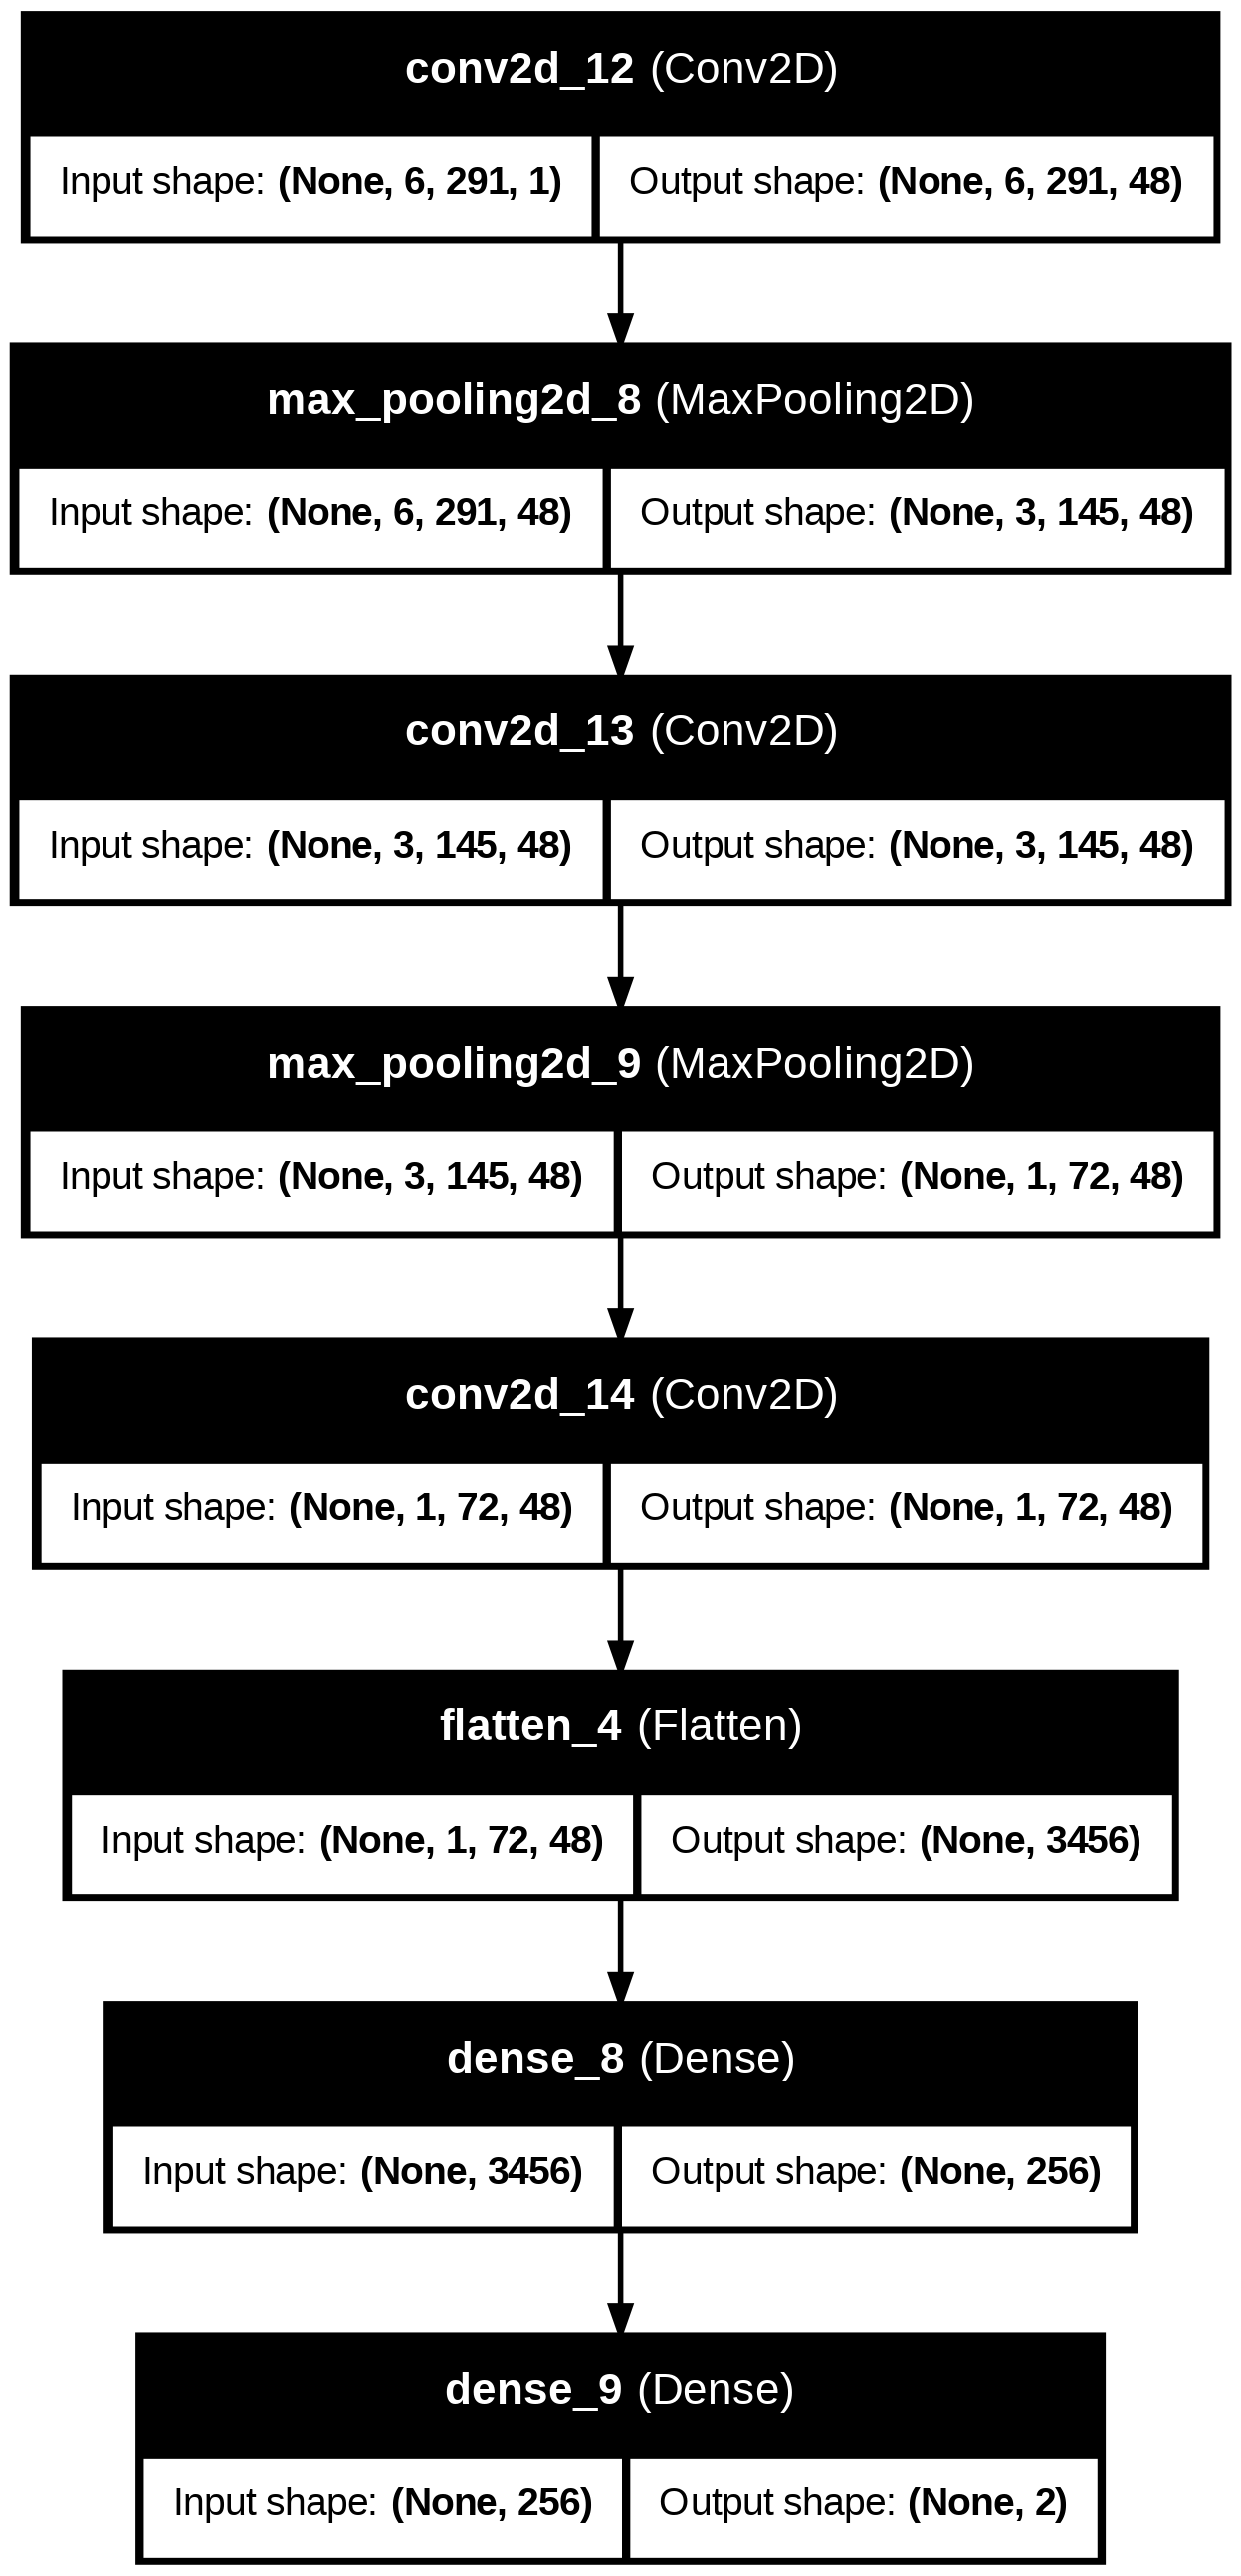

In [7]:
from tensorflow.keras.utils import plot_model

model = get_network((6, 291, 1))

# Assuming `model` is your Keras model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)